# Data Cleaning Outliers Assignment
    1.Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
    2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
    3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
    4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
    5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
    6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

## Importing the Data

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
                    postgres_user, postgres_pw, postgres_host, 
                    postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


## Cleaning the Data
See 17.3 assignment for cleaning

In [3]:
df = df.groupby('YEAR', as_index=False).apply(lambda x: x.fillna(x.mean())).reset_index()

df = df.apply(lambda x: x.interpolate(method='linear', limit_direction='forward'))
df = df.apply(lambda x: x.interpolate(method='linear', limit_direction='backward'))
df = df.apply(lambda x: x.interpolate(method='nearest'))


df.head()

,level_0,level_1,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,0,1,1992_ALASKA,ALASKA,1992,727716.0,1049591.0,106780.0,720711.0,222100.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712
2,0,2,1992_ARIZONA,ARIZONA,1992,727716.0,3258079.0,297888.0,1369815.0,1590376.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,0,3,1992_ARKANSAS,ARKANSAS,1992,727716.0,1711959.0,178571.0,958785.0,574603.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,0,4,1992_CALIFORNIA,CALIFORNIA,1992,727716.0,26260025.0,2072470.0,16546514.0,7641041.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067


In [4]:
df.isna().sum()

level_0                         0
level_1                         0
PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

## 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Looking at the box plots below there is clear outliers in the data. According to the statistical methods used the Total Revenue had more outliers than the Total Expenditures.

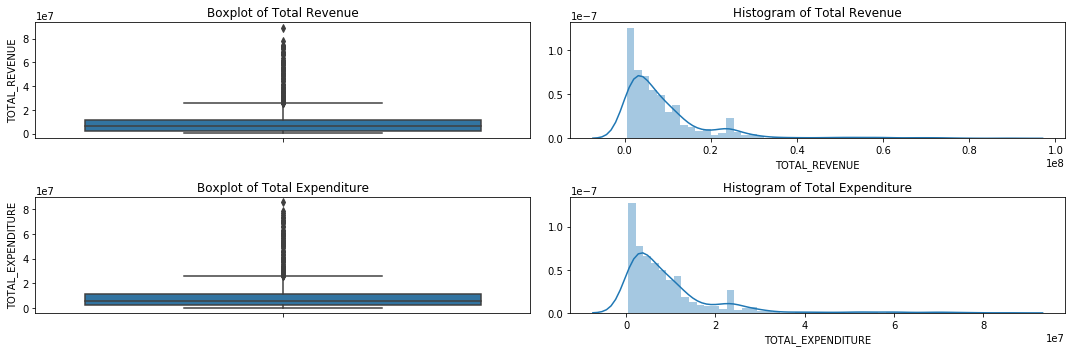

In [5]:
plt.figure(figsize=(15,5))

# Create box plot for total revenue and expenditure
plt.subplot(2, 2, 1)
sns.boxplot(df['TOTAL_REVENUE'], orient='v')
plt.title('Boxplot of Total Revenue')

plt.subplot(2, 2, 2)
sns.distplot(df['TOTAL_REVENUE'])
plt.title('Histogram of Total Revenue')

plt.subplot(2, 2, 3)
sns.boxplot(df['TOTAL_EXPENDITURE'], orient='v')
plt.title('Boxplot of Total Expenditure')

plt.subplot(2, 2, 4)
sns.distplot(df['TOTAL_EXPENDITURE'])
plt.title('Histogram of Total Expenditure')

plt.tight_layout()
plt.show()

In [6]:
# statistically looking for outliers in total revenue
q75, q25 = np.percentile(df['TOTAL_REVENUE'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, .5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
        len((np.where((df['TOTAL_REVENUE'] > max_val) 
                      | (df['TOTAL_REVENUE'] < min_val))[0]))
        ))

The score threshold is: 1.0
Number of outliers is: 185
The score threshold is: 1.5
Number of outliers is: 97
The score threshold is: 2.0
Number of outliers is: 61
The score threshold is: 2.5
Number of outliers is: 49
The score threshold is: 3.0
Number of outliers is: 43
The score threshold is: 3.5
Number of outliers is: 39
The score threshold is: 4.0
Number of outliers is: 33
The score threshold is: 4.5
Number of outliers is: 27


In [7]:
# statistically looking for outliers in total expenditures
q75, q25 = np.percentile(df['TOTAL_EXPENDITURE'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, .5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
    len((np.where((df['TOTAL_REVENUE'] > max_val) 
                      | (df['TOTAL_REVENUE'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 182
The score threshold is: 1.5
Number of outliers is: 97
The score threshold is: 2.0
Number of outliers is: 58
The score threshold is: 2.5
Number of outliers is: 48
The score threshold is: 3.0
Number of outliers is: 42
The score threshold is: 3.5
Number of outliers is: 37
The score threshold is: 4.0
Number of outliers is: 33
The score threshold is: 4.5
Number of outliers is: 25


## 2. Apply the techniques to eliminate the outliers and validate that there's no outlier values after you handled them.

The outliers of total revenue and total expenditures were log transformed below. The log transformaiton was chosen due to the data not being normalized in the graph above. See the graphs and statistics below for verification of no outliers.

In [8]:
# transform both total revenue and expenditure
df['LOG TOTAL REV'] = np.log(df['TOTAL_REVENUE'])
df['LOG TOTAL EXP'] = np.log(df['TOTAL_EXPENDITURE'])

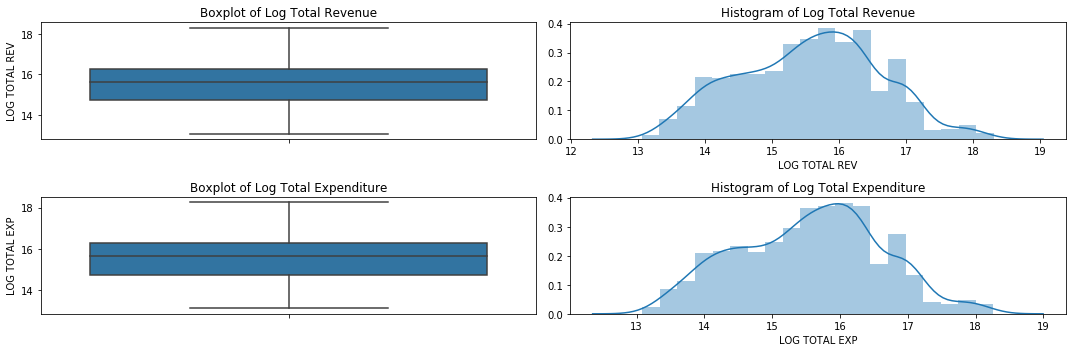

In [9]:
plt.figure(figsize=(15,5))

# Create box plot for total revenue and expenditure
plt.subplot(2, 2, 1)
sns.boxplot(df['LOG TOTAL REV'], orient='v')
plt.title('Boxplot of Log Total Revenue')

plt.subplot(2, 2, 2)
sns.distplot(df['LOG TOTAL REV'])
plt.title('Histogram of Log Total Revenue')

plt.subplot(2, 2, 3)
sns.boxplot(df['LOG TOTAL EXP'], orient='v')
plt.title('Boxplot of Log Total Expenditure')

plt.subplot(2, 2, 4)
sns.distplot(df['LOG TOTAL EXP'])
plt.title('Histogram of Log Total Expenditure')

plt.tight_layout()
plt.show()

In [10]:
# statistically looking for outliers in log total revenue
q75, q25 = np.percentile(df['LOG TOTAL REV'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, .5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
        len((np.where((df['LOG TOTAL REV'] > max_val) 
                      | (df['LOG TOTAL REV'] < min_val))[0]))
        ))


The score threshold is: 1.0
Number of outliers is: 28
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [11]:
# statistically looking for outliers in log total expenditure
q75, q25 = np.percentile(df['LOG TOTAL EXP'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, .5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
        len((np.where((df['LOG TOTAL EXP'] > max_val) 
                      | (df['LOG TOTAL EXP'] < min_val))[0]))
        ))

The score threshold is: 1.0
Number of outliers is: 27
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


## 3. Create net income variable and verify there are no outliers
The net income variable was created below. Several outliers were identified in the charts below. The outliers were removed via winsorization.

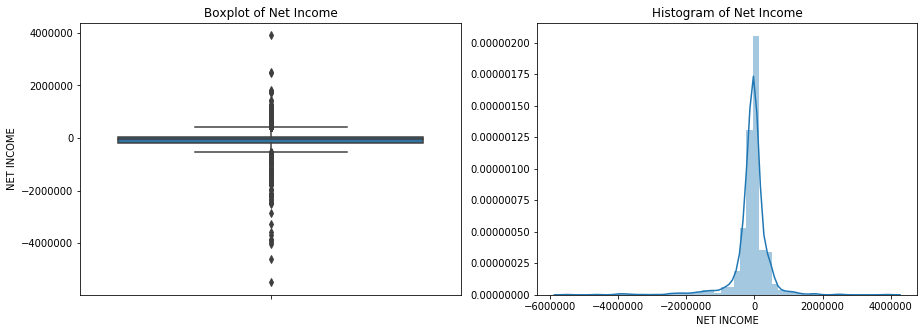

In [12]:
# create new variable from difference between revenue and expenditures
df['NET INCOME'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

# chart the variables to verify no outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df['NET INCOME'], orient='v')
plt.title('Boxplot of Net Income')

plt.subplot(1, 2, 2)
sns.distplot(df['NET INCOME'])
plt.title('Histogram of Net Income')

plt.show()

In [13]:
# winsorize the data to remove outliers
df['WINSORIZED NET INCOME'] = winsorize(df['NET INCOME'], (.08, .05))

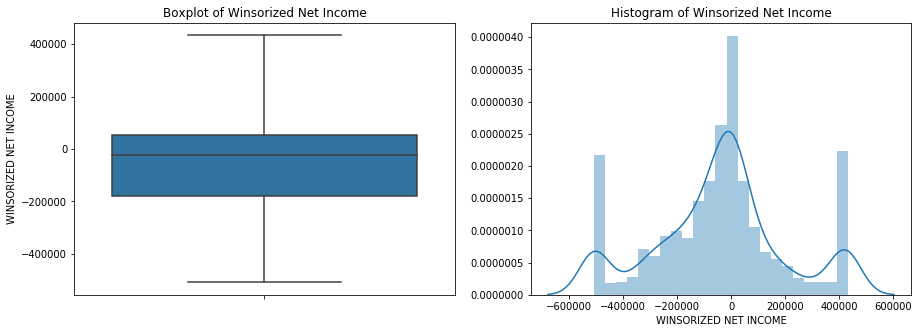

In [14]:
# chart the variables to verify no outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df['WINSORIZED NET INCOME'], orient='v', whis=3)
plt.title('Boxplot of Winsorized Net Income')

plt.subplot(1, 2, 2)
sns.distplot(df['WINSORIZED NET INCOME'])
plt.title('Histogram of Winsorized Net Income')

plt.show()

## 4. Net Income Outliers from cleaned total revenue and total expenditure
Surprisingly there is outliers from this recreated net income from cleaned variables. The outliers were removed again. See below for charts and figures.


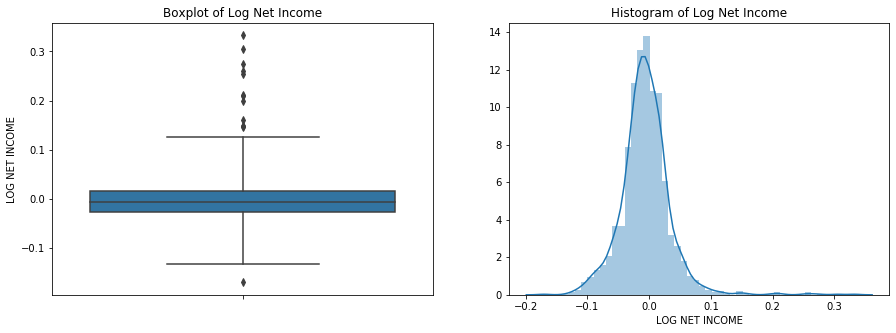

In [15]:
# create variable from cleaned outliers
df['LOG NET INCOME'] = df['LOG TOTAL REV'] - df['LOG TOTAL EXP']

# chart the variables to verify no outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df['LOG NET INCOME'], orient='v', whis=3)
plt.title('Boxplot of Log Net Income')

plt.subplot(1, 2, 2)
sns.distplot(df['LOG NET INCOME'])
plt.title('Histogram of Log Net Income')

plt.show()

In [16]:
# statistically looking for outliers in log total expenditure
q75, q25 = np.percentile(df['LOG NET INCOME'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, .5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
        len((np.where((df['LOG NET INCOME'] > max_val) 
                      | (df['LOG NET INCOME'] < min_val))[0]))
        ))

The score threshold is: 1.0
Number of outliers is: 138
The score threshold is: 1.5
Number of outliers is: 64
The score threshold is: 2.0
Number of outliers is: 27
The score threshold is: 2.5
Number of outliers is: 15
The score threshold is: 3.0
Number of outliers is: 13
The score threshold is: 3.5
Number of outliers is: 8
The score threshold is: 4.0
Number of outliers is: 8
The score threshold is: 4.5
Number of outliers is: 7


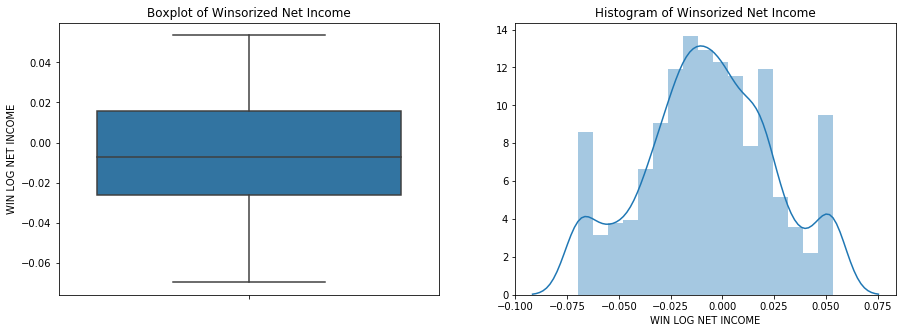

In [17]:
df['WIN LOG NET INCOME'] = winsorize(df['LOG NET INCOME'], (.05,.05))

# chart the variables to verify no outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df['WIN LOG NET INCOME'], orient='v')
plt.title('Boxplot of Winsorized Net Income')

plt.subplot(1, 2, 2)
sns.distplot(df['WIN LOG NET INCOME'])
plt.title('Histogram of Winsorized Net Income')

plt.show()

In [18]:
# statistically looking for outliers in log total expenditure
q75, q25 = np.percentile(df['WIN LOG NET INCOME'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, .5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
        len((np.where((df['WIN LOG NET INCOME'] > max_val) 
                      | (df['WIN LOG NET INCOME'] < min_val))[0]))
        ))

The score threshold is: 1.0
Number of outliers is: 79
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


## 5. 
looking at the descriptive statistics below the stats are the same for both sets. 

In [20]:
df['WINSORIZED NET INCOME'].describe()

count    1492.000000
mean       -0.007142
std         0.031440
min        -0.069891
25%        -0.026404
50%        -0.007093
75%         0.015524
max         0.053541
Name: WIN LOG NET INCOME, dtype: float64

In [21]:
df['WIN LOG NET INCOME'].describe()

count    1492.000000
mean       -0.007142
std         0.031440
min        -0.069891
25%        -0.026404
50%        -0.007093
75%         0.015524
max         0.053541
Name: WIN LOG NET INCOME, dtype: float64

## 6.
Either method works as they got the same results.